## Projeto do Capítulo 01: Visualizando Campos Elétricos

## 1. Campo Elétrico de uma distribuição de cargas pontuais

> ***Lei de Coulomb***: A força elétrica sobre uma carga de teste $Q$ localizada no ponto $P$ (na posição $\mathbf{r}$), devida a uma carga pontual $q_0$ localizada em $\mathbf{r_0}$ é dada por:

$$
    \mathbf{F_0} = k \dfrac{q_0 Q}{(\mathbf{r} - \mathbf{r_0})^2} \dfrac{\mathbf{r} - \mathbf{r_0}}{|\mathbf{r} - \mathbf{r_0}|}
$$
onde a constante de Coulomb é $k = \dfrac{1}{4\pi\epsilon_0}$ em unidade do (Sistema Internacional) SI (e $\epsilon_0$ é a permissividade do espaço livre.)

> O ***Campo Elétrico*** ($\mathbf{E}$) é a razão da força $\mathbf{F}$ pela carga de prova $Q$ no limite que  que a magnitude da carga de prova tende a zero. ou seja,

$$
    \mathbf{E} = \lim_{Q \rightarrow 0} \dfrac{\mathbf{F}}{Q} = k q_0 \dfrac{\mathbf{r} - \mathbf{r_0}}{|\mathbf{r} - \mathbf{r_0}|}
$$

> ***Princípio da Superposição***:  A força resultante sobre $Q$ é dada pela soma vetorial das forças individuais sobre $Q$.

Consideremos $n$ cargas puntuais $q_0, q_1, \cdots, q_{n-1}$ localizadas, respectivamente, em $\mathbf{r_0}, \mathbf{r_1}, \cdots, \mathbf{r_{n-1}}$. O campo elétrico tocal no ponto $\mathbf{r}$ é

$$
    \mathbf{E}(\mathbf{r}) = \sum_{i=0}^{n-1} \mathbf{E_i}(\mathbf{r}) = \sum_{i = 0}^{n-1} kq_i \dfrac{\mathbf{r} - \mathbf{r_i}}{|\mathbf{r} - \mathbf{r_i}|^3}
$$

## 2. Plotando Campos de Linha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import sqrt
from copy import deepcopy
from decimal import Decimal

In [2]:
def makefields(xs, ys, qtopos):
    n = len(xs)
    Exs = [[0. for k in range(n)] for j in range(n)]
    Eys = deepcopy(Exs)
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for particle in qtopos:
                q = particle["q"]
                posx, posy = particle["r"]
                R = sqrt((x - posx)**2 + (y - posy)**2)
                if R > -0.1 and R < 0.1:
                    continue
                Exs[k][j] += q*(x-posx)/R**3
                Eys[k][j] += q*(y-posy)/R**3
    return Exs, Eys



def get_boxl(qtopos, n=20):
    xmin = min([_["r"][0] for _ in qtopos])
    xmax = max([_["r"][0] for _ in qtopos])
    ymin = min([_["r"][1] for _ in qtopos])
    ymax = max([_["r"][1] for _ in qtopos])
    xmin = xmin if xmin < -2 else -2
    xmax = xmax if xmax >  2 else  2
    ymin = ymin if ymin < -2 else -2
    ymax = ymax if ymax >  2 else  2
    xs = [xmin + k*(xmax-xmin)/(n-1) for k in range(n)]
    ys = [ymin + k*(ymax-ymin)/(n-1) for k in range(n)]
    return xs, ys


def plotfield(qtopos, n, title="", save_path=None):
    xs, ys = get_boxl(qtopos, n)
    Exs, Eys = makefields(xs, ys, qtopos)
    xs = np.array(xs); ys = np.array(ys)
    Exs = np.array(Exs); Eys=np.array(Eys)
    plt.streamplot(xs, ys, Exs, Eys, density=1.5, color='gray', linewidth=0.5)
    for particle in qtopos:
        q = particle["q"]
        posx, posy = particle["r"]
        mk = "ro" if q > 0 else "bo"
        plt.plot(posx, posy, mk, markersize=15)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(title, fontsize=10)
    legend1 = [Line2D([0], [0], color='r', marker='o', linestyle="", label='Cargas positivas')]
    legend2 = [Line2D([0], [0], color='b', marker='o', linestyle="", label='Cargas negativas')]
    plt.legend(handles=legend1+legend2, loc="upper left")
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

### Aplicações

1. Duas cargas pontuais:

$$
\begin{cases}
    q_0 = 1 \text{ em } \mathbf{r_0} = (-1, 0);\\
    q_1 = -1 \text{ em } \mathbf{r_1} = (1, 0);\\
\end{cases}
$$

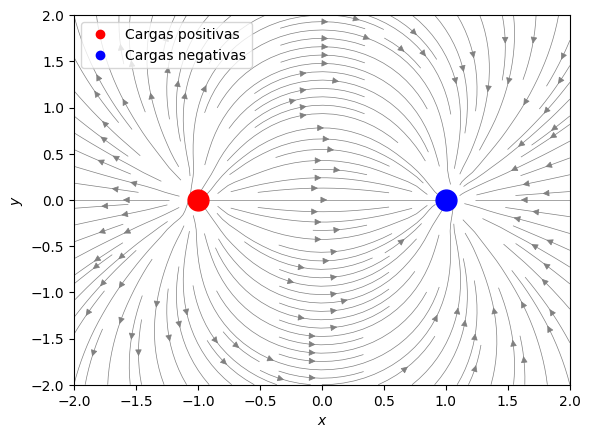

In [3]:
qtopos = [
    {
        "q": 1,
        "r": (-1,0)
    },
    {
        "q": -1,
        "r": (1, 0)
    }
]

plotfield(qtopos, n=20)

2. Quatro cargas pontuais:

$$
\begin{cases}
    q_0 = 1 \text{ em } \mathbf{r_0} = (-1, 0);\\
    q_1 = 1 \text{ em } \mathbf{r_1} = (1, 0);\\
    q_2 = -1 \text{ em } \mathbf{r_2} = (0, -1);\\
    q_3 = -1 \text{ em } \mathbf{r_3} = (0, 1);\\
\end{cases}
$$

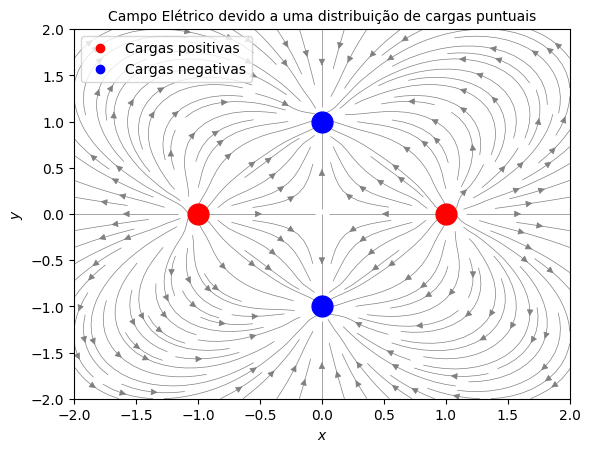

In [4]:
qtopos = [
    {
        "q": 1,
        "r": (-1,0)
    },
    {
        "q": 1,
        "r": (1, 0)
    },
    {
        "q": -1,
        "r": (0, -1)
    },
    {
        "q": -1,
        "r": (0, 1)
    }
]

plotfield(
    qtopos, n=20, 
    title = "Campo Elétrico devido a uma distribuição de cargas puntuais",
    save_path="../assets/img/C01/campo-eletrico-4q.png")